<a href="https://colab.research.google.com/github/SiranjeeviChinnasamy/Data-Science---Python/blob/master/Mispriceddiamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
df = pd.read_csv('Mispriced-Diamonds.csv')

In [43]:
#EDA
df.head()


,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


In [44]:
df.describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


In [45]:
df.isnull().sum()

carat      0
clarity    0
price      0
dtype: int64

In [47]:
df.shape


(53940, 3)

In [0]:
# assigning dependent and independent value
x = df.iloc[:,2]
y = df.iloc[:,0]


In [0]:
#splitting the train and test data
x_train, x_test,y_train, y_test  = train_test_split(x,y,test_size = 0.25, random_state = 3)

In [0]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array (y_test)

In [0]:
x_train = x_train.reshape(-1,1)
x_test  = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [60]:
#model selection
Reg = linear_model.LinearRegression()
Reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = Reg.predict(x_test)

In [62]:
coefficient = Reg.coef_
coefficient

array([[0.00010933]])

In [63]:
intercept = Reg.intercept_
intercept

array([0.36754639])

In [64]:
# The mean squared error
# MSE = 1/n(yactual- ypredicted)2
MSE = mean_squared_error(y_test,y_pred)
MSE

0.03366826624691493

In [66]:
R2_score = r2_score(y_test,y_pred)
R2_score

0.8496561957175013

(array([6291., 2360., 1869.,  948.,  624.,  454.,  319.,  229.,  204.,
         187.]),
 array([0.40406243, 0.60598298, 0.80790353, 1.00982408, 1.21174463,
        1.41366518, 1.61558573, 1.81750628, 2.01942683, 2.22134738,
        2.42326793]),
 <a list of 10 Patch objects>)

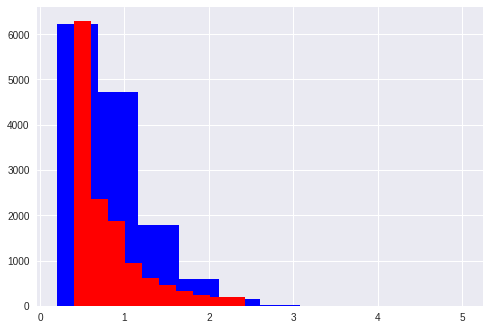

In [67]:
#Plot outputs
plt.hist(y_test, color='Blue')
plt.hist(y_pred, color='Red')

Text(0.5, 1.0, 'Residual Plot')

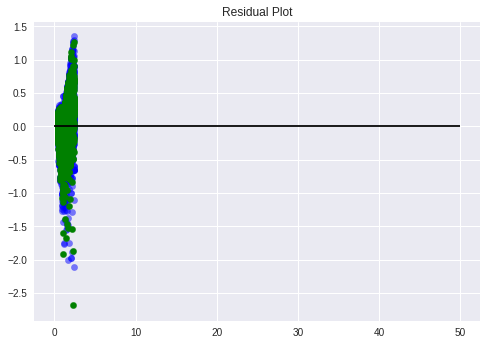

In [70]:
plt.scatter(Reg.predict(x_train),Reg.predict( x_train)- y_train, c= 'b', s=40, alpha = 0.5)
plt.scatter(Reg.predict(x_test), Reg.predict(x_test)-y_test, c='g', s=40)
plt.hlines(y= 0, xmin = 0, xmax= 50)
plt.title('Residual Plot')

In [0]:
plt.line